In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exploratory Data Analysis

In [ ]:
df_eda = pd.read_csv('/content/drive/MyDrive/DataScience/Algerian Forest Fires/Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
# df_eda = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [ ]:
df_full = df_eda.copy()

In [ ]:
df_eda = df_eda.drop(['day','month','year'],axis=1)

In [ ]:
df_eda.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [ ]:
df_eda['Classes'].value_counts()

,count
Classes,
fire,131
not fire,100
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [ ]:
# Encoding of the categories in classes
df_eda['Classes'] = np.where(df_eda['Classes'].str.contains('not fire'),0,1)

In [ ]:
# Encoding of the categories in classes
df_full['Classes'] = np.where(df_full['Classes'].str.contains('not fire'),'not fire','fire')

In [ ]:
df_eda.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [ ]:
df_eda['Classes'].value_counts()

,count
Classes,
1,137
0,105


# Visualizations

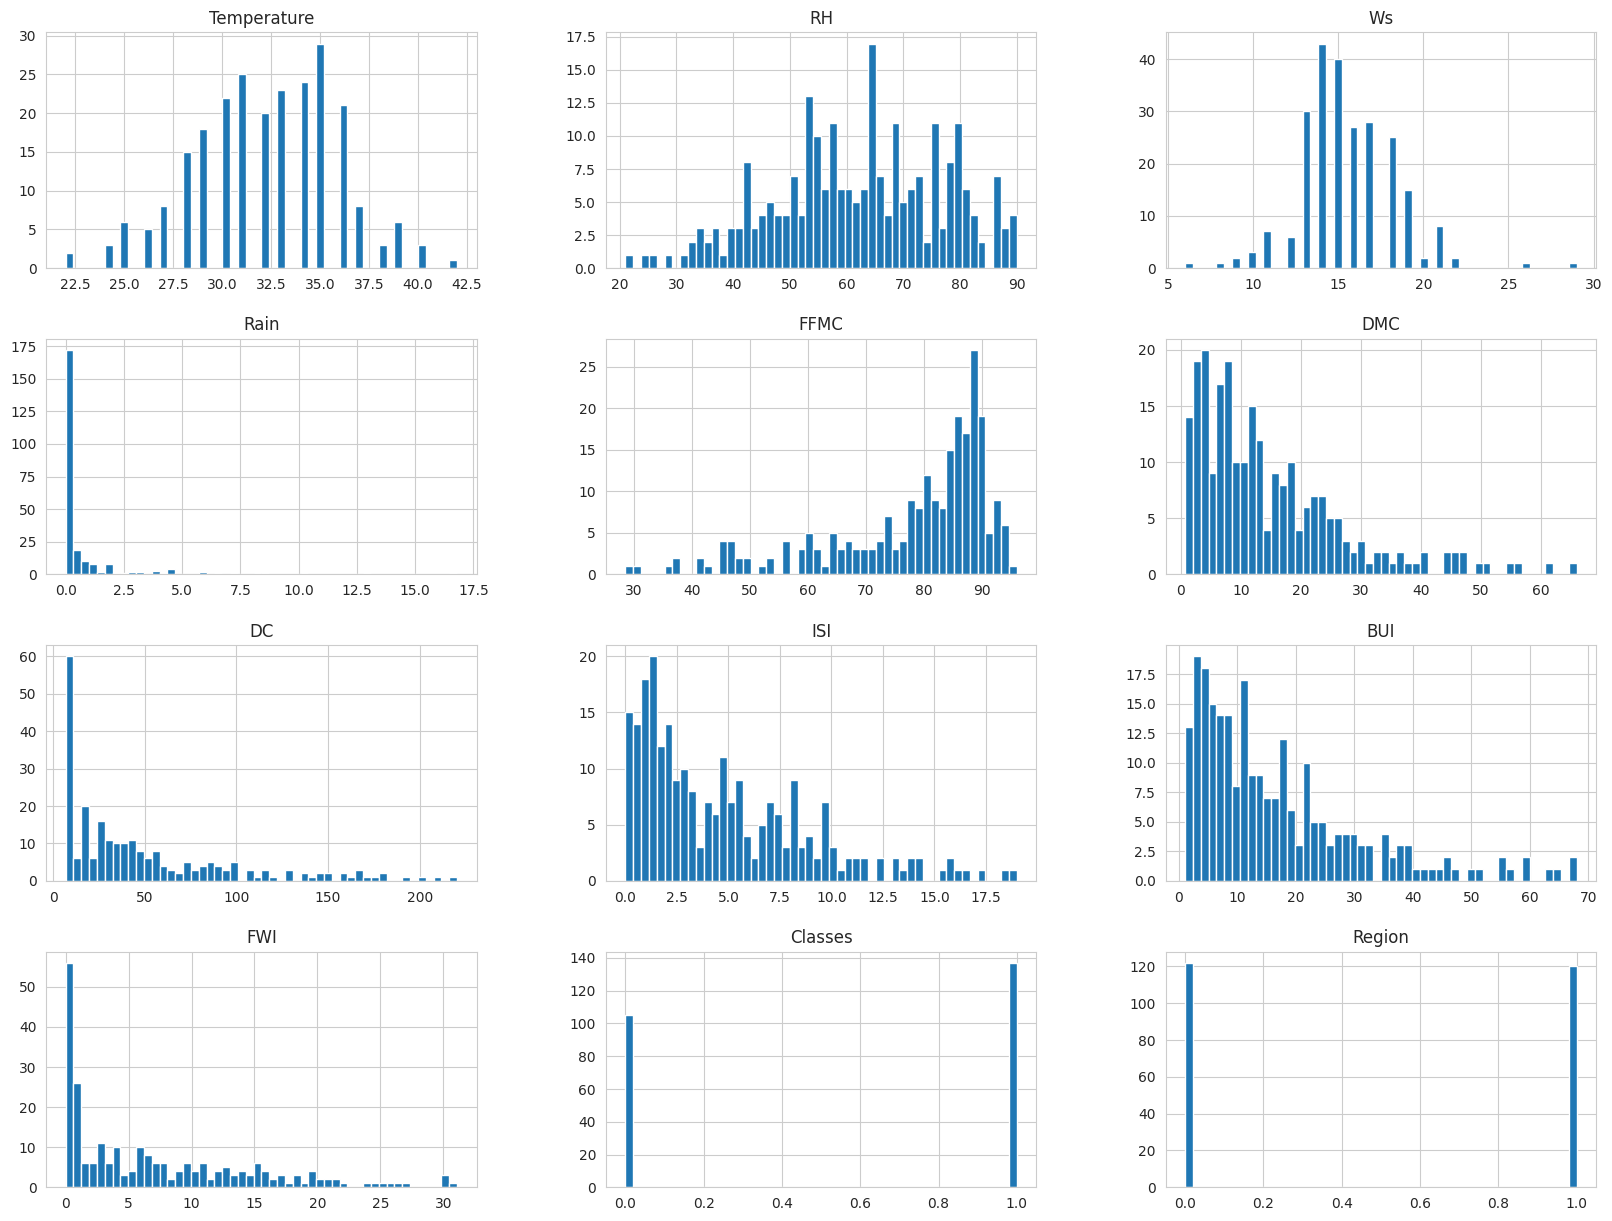

In [ ]:
# Density for all Features
df_eda.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# Percentage for Pie Chart
percentage= df_eda['Classes'].value_counts(normalize=True)*100

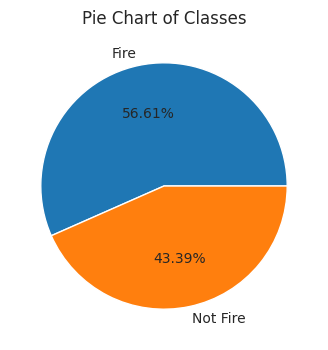

In [ ]:
# Plotting Pie Chart
class_labels = ["Fire","Not Fire"]
plt.figure(figsize=(4,4))
plt.pie(percentage,labels=class_labels,autopct='%1.2f%%',)
plt.title("Pie Chart of Classes")
plt.show()

In [ ]:
df_eda.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


<Axes: >

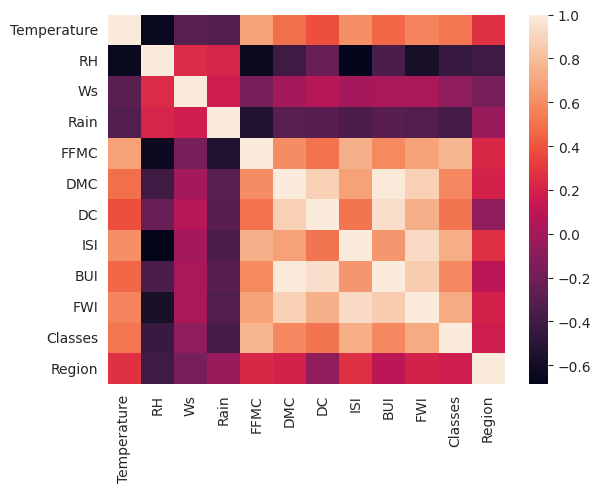

In [ ]:
sns.heatmap(df_eda.corr())

<Axes: xlabel='FWI'>

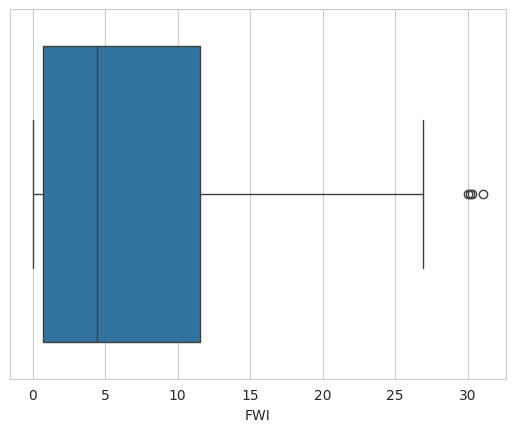

In [ ]:
# Box Plots
sns.boxplot(df_eda['FWI'],orient='h')

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

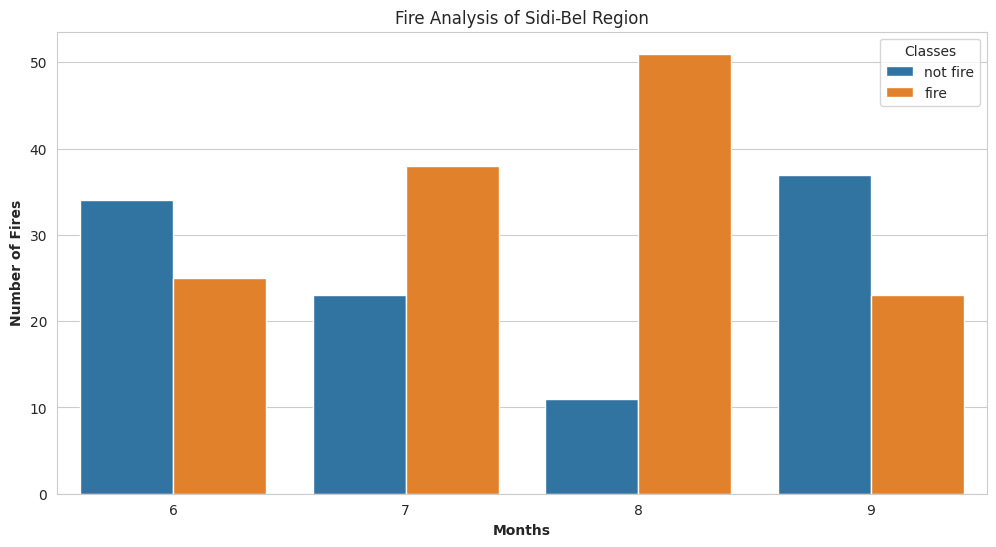

In [ ]:
## Monthly Fire Analysis
df_temp = df_full.loc[df_full['Region']==1]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df_full)
plt.ylabel('Number of Fires',weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.title("Fire Analysis of Sidi-Bel Region")

Text(0.5, 1.0, 'Fire Analysis of Sidi-Bel Region')

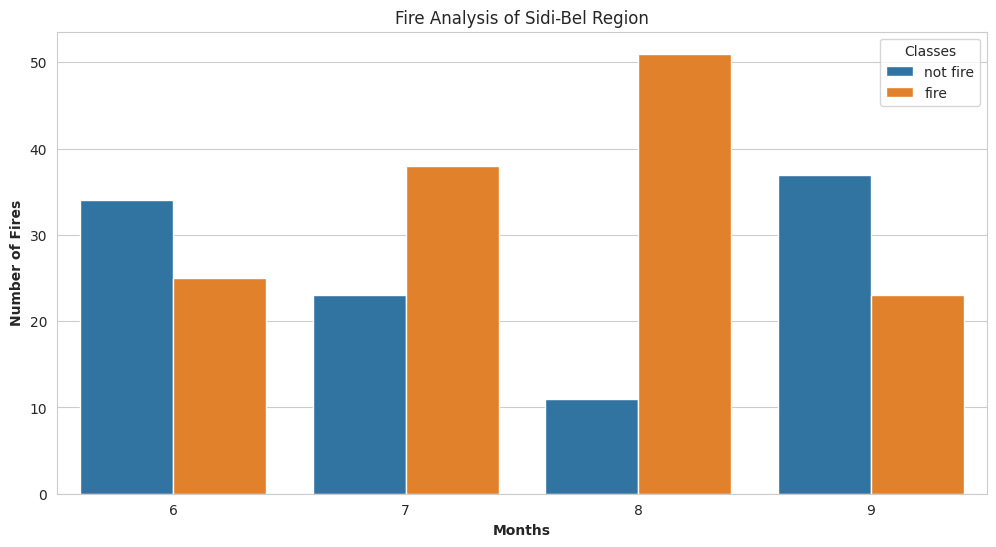

In [ ]:
## Monthly Fire Analysis
df_temp = df_full.loc[df_full['Region']==0]
plt.subplots(figsize=(12,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df_full)
plt.ylabel('Number of Fires',weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.title("Fire Analysis of Sidi-Bel Region")

## Inference
* It's observed that August and September had the most number of forest fires in both the regions, and from the above plot of months we can understand few things.

* Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

* Less Fires was in September